<a href="https://colab.research.google.com/github/AaronMcGowan/PHYS315/blob/master/UP1_template_ThinRodMOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breaking it up: Calculating the Moment of Inertia of a Thin Rod

Computational approach to integrating over continuous distributions of mass

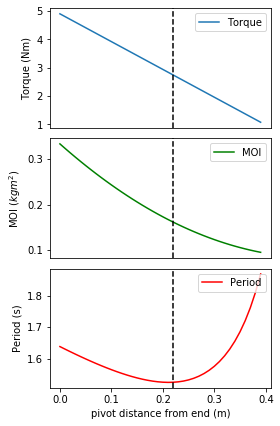

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
# Compute the moment of inertia (MOI) by breaking the rod into N pieces.
# Adapted from A. Titus's "efield-rod-exercise-6-visualization.ipynb"
#  by A. McGowan and J. Haverlick, 21 Oct 2019
getcontext().prec = 4

g = 9.806 # m/s**2
N = 10000 # total number of pieces, not to exceed ~1e6
L = 1.0 # length of rod in meters
#M = 0.832 # mass of rod in kg
M=1 #test, to check I=(ML^2)/3 for endpoint P


# compute the mass of each piece of the rod
dm = M / N # mass of each piece of the rod

# compute the length of each piece of the rod
dx = L / N #length of each piece of the rod
A = 0
omega = 0
N_pivots = 40
A_factors = np.zeros(N_pivots)
I_moments = np.zeros(N_pivots)
T_periods = np.zeros(N_pivots)
x_locs = np.zeros(N_pivots)

# loop over all pivot choices
x_p = 0
x_index = 0
while x_p < N_pivots/100: # m, moving the pivot by 1 cm each iteration
  i = 0 # piece counter used for the loop; piece 0 is the piece at the left end
  r_i = 0 # initialize distance from center of each piece i to point P (rotation axis)
  # calculate contribution to MOI from each dm
  dMOI = 0
  MOI = 0
  print("Pivot is",Decimal(x_p)*100,"cm from endpoint:")

  # Calculate new gravitational torgue factor A = (L/2 -x)Mg
  #  about P 
  #  where omega**2 = A / I_x, and period T = 2pi/omega .
  A = (L/2 - x_p) * M * g
#  print(" Gravitational torque factor A is ",A,"N m")
  A_factors[x_index]=A
  # loop over all segments of meter stick to calculate new MOI
  while i < N:
      # treat each piece of the rod as a point mass located at the midpoint of that piece
    
      ###### EDIT HERE: write the new r vector magnitude from the pivot to the dm ######
      r_i =  # distance from P to midpoint of piece i    
      ##################################################################################

      # compute the dMOI due to this i-th piece
      dMOI = dm * r_i**2 # dMOI due to piece i, in kg m^2
          
      MOI = MOI + dMOI # MOI due to all pieces 0 through i, in N/C
    
      i = i + 1 # increment to the next piece

#  print(" The moment of inertia is = ",Decimal(MOI)*1, "kg m^2")
  I_moments[x_index]=MOI
  omega = math.sqrt(A/MOI)
  period = 2*math.pi/omega
  print("   The period is",period," s")
  T_periods[x_index]=period
  x_locs[x_index]=x_p
  
  x_p += 0.01 # increment pivot location by 1 cm
  x_index += 1
#print("A_factors:",A_factors)
#print("I_moments:",I_moments)
#print("T_periods:",T_periods)

plt.figure(figsize=(4,6))
plt.subplot(3,1,1)

plt.plot(x_locs,A_factors,label="Torque")
plt.legend()
plt.ylabel("Torque (Nm)")
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.subplot(3,1,2)

plt.plot(x_locs,I_moments,label="MOI",color="g")
plt.legend()
plt.ylabel("MOI $(kg m^2)$")
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.subplot(3,1,3)

plt.plot(x_locs,T_periods,label="Period",color="r")
plt.legend(loc="upper right")
plt.ylabel("Period (s)")

#plt.legend()
plt.xlabel("pivot distance from end (m)")
#plt.ylabel("torque (Nm), MOI (kg m^2), period (s)")
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

# New Section